# Incoporating R1 and FRB180916

In [55]:
# imports
import numpy as np

from astropy.table import Table
from astropy.io import fits
from astropy.time import Time
from astropy import units, constants

from linetools.spectra import xspectrum1d
from linetools.spectra import io as lsio

# R1 - CSV file provided by S. Tendulkar

## Load

In [2]:
r1_data = Table.read('J053158.70+330852.7_GMOS_N.csv')

In [4]:
r1_data[0:5]

w,f_nu,sf_nu
float64,float64,float64
4658.35890975,-0.6011887544912636,6.464833018542048
4666.26116675,0.38199855232201607,3.4622999313297056
4674.18077775,0.5227645752635679,3.4616186446494743
4682.102500000001,-0.07513509461609696,3.505975356609319
4690.0265,-0.576941593826001,3.450295261408354


## Convert fnu muJy to flambda

In [20]:
fnu = r1_data['f_nu'] * units.uJy

In [23]:
flamb = fnu * constants.c / (r1_data['w'] * units.Angstrom)**2

In [27]:
flamb = flamb.to('erg/s/cm**2/Angstrom')

In [30]:
np.median(flamb)

<Quantity 1.35362461e-19 erg / (Angstrom cm2 s)>

In [31]:
sig_fnu = r1_data['sf_nu'] * units.uJy
sig_flamb = (sig_fnu * constants.c / (r1_data['w'] * units.Angstrom)**2).to('erg/s/cm**2/Angstrom')

## Turn into XSpec1D

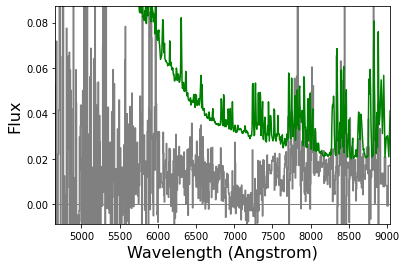

In [50]:
scale = 1e17
r1_xspec = xspectrum1d.XSpectrum1D.from_tuple((r1_data['w'], flamb.value*scale, sig_flamb.value*scale))
r1_xspec.plot()

### Error array looks much too high...

## Generate a header

In [8]:
r1_h = fits.PrimaryHDU(r1_xspec.flux).header
r1_h

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                  768                                                  
EXTEND  =                    T                                                  

## Add to it

In [49]:
r1_h['INSTRUME'] = 'GMOS-N'
r1_h['DISPNAME'] = 'R400+_G5305'
r1_h['DECKER'] = '1.0arcsec'

In [13]:
obs_date = Time('2016-11-10')  # approximate
r1_h['MJD-OBS'] = obs_date.mjd

In [14]:
r1_h

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                  768                                                  
EXTEND  =                    T                                                  
INSTR   = 'GMOS-N  '                                                            
DISPNAME= 'R400+_G5305'                                                         
DECKER  = '1.0arcsec'                                                           
MJD-OBS =              57702.0                                                  

## Write

In [51]:
r1_xspec.meta['headers'] = [r1_h]

In [52]:
r1_xspec.write_to_fits('J053158.70+330852.7_GMOS-N_spec.fits')

Wrote spectrum to J053158.70+330852.7_GMOS-N_spec.fits


----

# FRB 180916 -- FITS file from S. Tendulkar

In [53]:
hdul = fits.open('J015800.28+654253.0_spec.fits')
hdul.info()

Filename: J015800.28+654253.0_spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (3138,)   float32   


In [56]:
wave = lsio.setwave(hdul[0].header)
wave

array([5035.40478516, 5036.92191577, 5038.43904638, ..., 9791.60925794,
       9793.12638855, 9794.64351916])

/data/Projects/Python/linetools/linetools/spectra/xspectrum1d.py:107: UserWarning: Assuming wavelength unit is Angstroms
  warnings.warn("Assuming wavelength unit is Angstroms")
/data/Projects/Python/linetools/linetools/spectra/xspectrum1d.py:734: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(*get_flux_plotrange(self.flux))


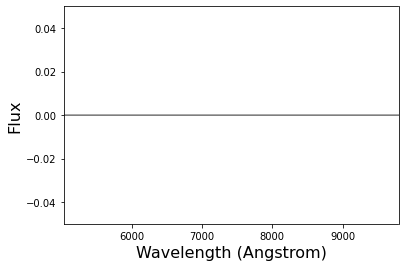

In [57]:
f18_xspec = xspectrum1d.XSpectrum1D.from_tuple((wave, hdul[0].data))
f18_xspec.plot()

In [59]:
hdul[0].data.max()

0.0